Asante Yiadom Prosper

##  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder



## Loading Dataset

In [2]:
df = pd.read_csv("E-commerce Website Logs.csv")

C:\Users\fakisseh\AppData\Local\Temp\ipykernel_3536\1154932658.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E-commerce Website Logs.csv")


## Exporatory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB


In [4]:
df.head(10)

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0000,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0000,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0000,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0000,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0000,Cash
5,2017-03-14 18:17:09.005,3847,TCP,1.124.48.210,10200,Mozilla Firefox,28,Female,CA,Normal,English,48.8600,No,0.0000,Credit Card
6,2017-03-14 19:46:37.327,2090,TCP,1.124.48.99,310900,Mozilla Firefox,49,Female,CN,Normal,English,0.0000,Yes,957.5775,Cash
7,2017-03-14 19:46:37.327,2793,TCP,1.126.48.118,10700,Mozilla Firefox,32,Female,AT,Normal,English,907.1520,No,0.0000,Credit Card
8,2017-03-14 19:02:42.704,3396,TCP,1.126.48.171,250200,Mozilla Firefox,69,Male,US,Normal,Spanish,18.5040,No,0.0000,Others
9,2017-03-14 19:02:42.704,2064,TCP,1.126.48.47,20600,Mozilla Firefox,60,Female,CA,Normal,Spanish,114.9000,No,0.0000,Credit Card


In [5]:
df.tail(10)

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
172828,2017-03-16 11:51:09.259,3713,TCP,129.137.165.260,120400,Android App,NaN,Female,CN,Normal,English,600.16,No,0.00,Cash
172829,2017-03-16 11:51:09.259,4953,TCP,94.178.136.118,60200,Android App,NaN,Female,CN,Normal,Russian,81.32,No,0.00,Cash
172830,2017-03-16 11:31:38.974,3163,TCP,129.2.102.131,70200,Android App,NaN,Female,CN,Normal,English,162.64,No,0.00,Debit Card
172831,2017-03-16 11:31:38.974,3268,TCP,94.176.74.12,150000,Android App,NaN,Female,US,Normal,Russian,1500.40,No,0.00,Others
172832,2017-03-16 11:42:01.298,2693,TCP,129.72.149.67,90300,Android App,NaN,Female,PL,Normal,English,203.30,No,0.00,Credit Card
172833,2017-03-16 11:42:01.298,4372,TCP,94.197.121.229,100600,Android App,NaN,Male,US,Normal,English,0.00,Yes,143.36,Debit Card
172834,2017-03-16 12:10:17.340,2167,TCP,129.110.241.72,30400,Android App,NaN,Female,IT,Normal,English,15.15,No,0.00,Cash
172835,2017-03-16 12:10:17.340,2725,TCP,185.119.252.121,100300,Android App,NaN,Female,IT,Normal,English,600.16,No,0.00,Credit Card
172836,2017-03-16 15:52:58.342,3728,TCP,185.145.107.23,50200,Android App,NaN,Male,US,Normal,Russian,75.75,No,0.00,Cash
172837,2017-03-16 15:52:58.342,3420,TCP,202.69.12.251,170800,Android App,NaN,Female,CA,Normal,English,23.46,No,0.00,Credit Card


In [6]:
df= df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99457 entries, 0 to 99456
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   accessed_date     99457 non-null  object 
 1   duration_(secs)   99457 non-null  int64  
 2   network_protocol  99457 non-null  object 
 3   ip                99457 non-null  object 
 4   bytes             99457 non-null  int64  
 5   accessed_Ffom     99457 non-null  object 
 6   age               99457 non-null  object 
 7   gender            99457 non-null  object 
 8   country           99457 non-null  object 
 9   membership        99457 non-null  object 
 10  language          99457 non-null  object 
 11  sales             99457 non-null  float64
 12  returned          99457 non-null  object 
 13  returned_amount   99457 non-null  float64
 14  pay_method        99457 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 12.1+ MB


In [8]:
df["accessed_From"] = df["accessed_Ffom"]
df = df.drop("accessed_Ffom",axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99457 entries, 0 to 99456
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   accessed_date     99457 non-null  object 
 1   duration_(secs)   99457 non-null  int64  
 2   network_protocol  99457 non-null  object 
 3   ip                99457 non-null  object 
 4   bytes             99457 non-null  int64  
 5   age               99457 non-null  object 
 6   gender            99457 non-null  object 
 7   country           99457 non-null  object 
 8   membership        99457 non-null  object 
 9   language          99457 non-null  object 
 10  sales             99457 non-null  float64
 11  returned          99457 non-null  object 
 12  returned_amount   99457 non-null  float64
 13  pay_method        99457 non-null  object 
 14  accessed_From     99457 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 12.1+ MB


In [10]:
df.describe()

,duration_(secs),bytes,sales,returned_amount
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,3251.364328,1402.250621,360.273099,72.080813
std,1011.849589,7484.018496,736.018297,361.073570
min,1500.000000,28.000000,0.000000,0.000000
25%,2373.000000,250.000000,0.000000,0.000000
50%,3251.000000,579.000000,40.660000,0.000000
75%,4128.000000,2267.000000,244.550000,0.000000
max,5000.000000,897983.000000,11199.968000,7999.980000


In [11]:
df["gender"].value_counts()

gender
Female     50682
Male       34032
Unknown    14743
Name: count, dtype: int64

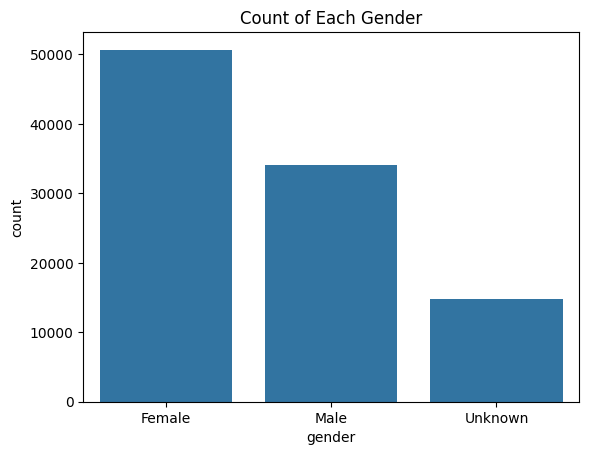

In [12]:
sns.countplot(data=df, x='gender')
plt.title('Count of Each Gender')
plt.show()

In [13]:
df["membership"].value_counts()

membership
Premium          54847
Normal           29867
Not Logged In    14743
Name: count, dtype: int64

<Axes: xlabel='membership', ylabel='count'>

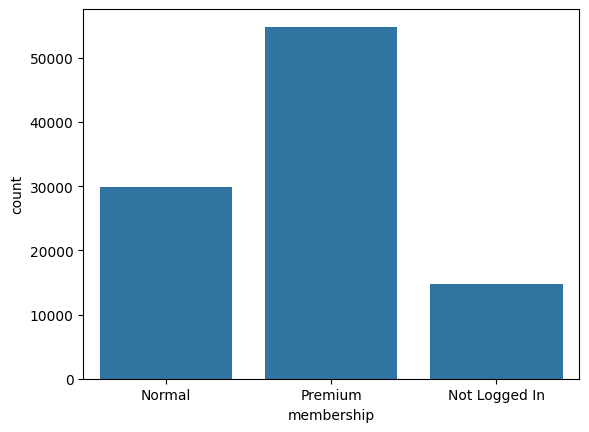

In [14]:
sns.countplot(data=df, x="membership")

<Axes: ylabel='count'>

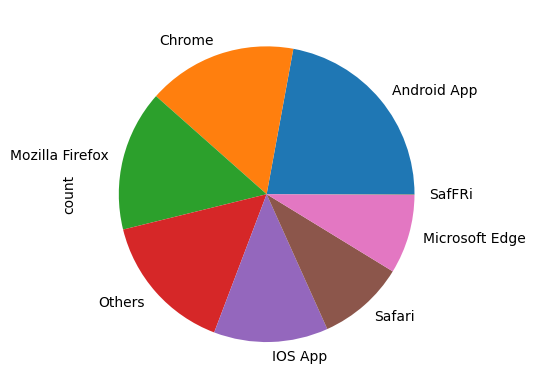

In [15]:
df['accessed_From'].value_counts().plot.pie()

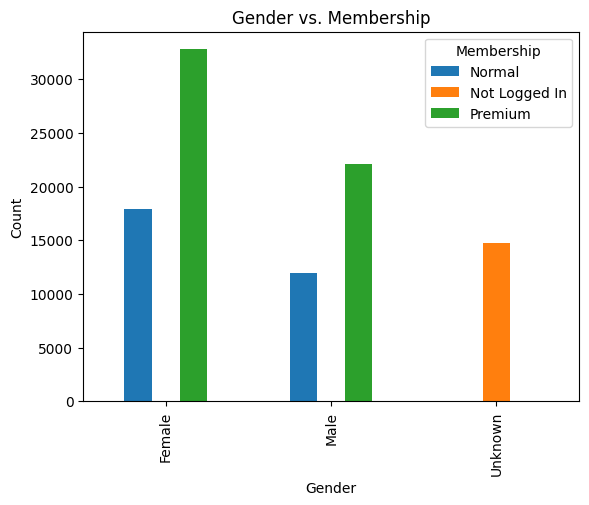

In [16]:
cross_tab = pd.crosstab(df['gender'], df['membership'])
cross_tab.plot(kind='bar', stacked=False)
plt.title('Gender vs. Membership')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Membership')
plt.show()


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99457 entries, 0 to 99456
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   accessed_date     99457 non-null  object 
 1   duration_(secs)   99457 non-null  int64  
 2   network_protocol  99457 non-null  object 
 3   ip                99457 non-null  object 
 4   bytes             99457 non-null  int64  
 5   age               99457 non-null  object 
 6   gender            99457 non-null  object 
 7   country           99457 non-null  object 
 8   membership        99457 non-null  object 
 9   language          99457 non-null  object 
 10  sales             99457 non-null  float64
 11  returned          99457 non-null  object 
 12  returned_amount   99457 non-null  float64
 13  pay_method        99457 non-null  object 
 14  accessed_From     99457 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 12.1+ MB


Text(0, 0.5, '')

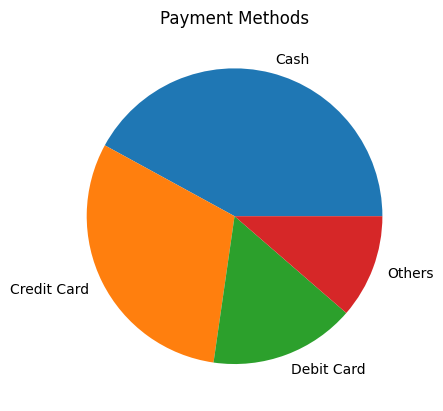

In [18]:
df['pay_method'].value_counts().plot.pie()
plt.title("Payment Methods")
plt.ylabel("")

In [19]:
df['language'].nunique()

30

In [20]:
df.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,age,gender,country,membership,language,sales,returned,returned_amount,pay_method,accessed_From
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card,Chrome
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card,Mozilla Firefox
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,20,Male,PL,Normal,English,14.6200,No,0.0,Cash,Mozilla Firefox
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card,Mozilla Firefox
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash,Mozilla Firefox


<Axes: xlabel='membership'>

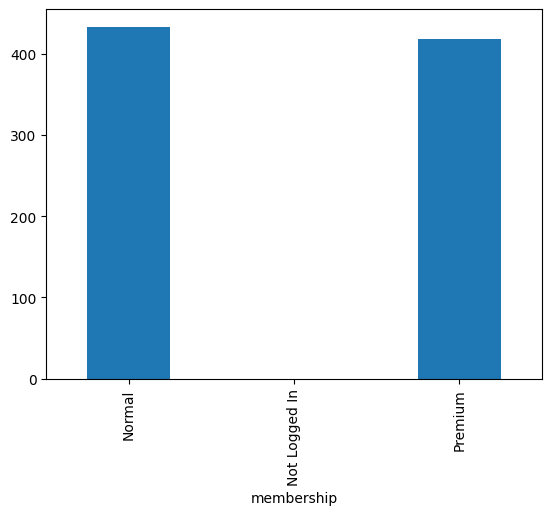

In [21]:
df.groupby("membership")["sales"].mean().plot(kind="bar")

Text(0.5, 1.0, 'Top 10 Countries by Sales')

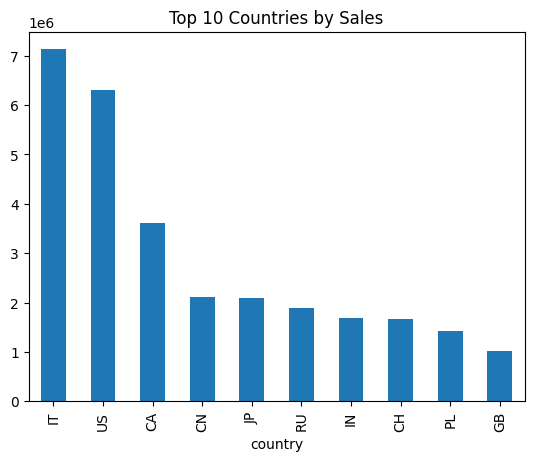

In [22]:
top_10 = df.groupby("country")["sales"].sum().sort_values(ascending=False).head(10)
top_10.plot(kind="bar")
plt.title("Top 10 Countries by Sales")


<Axes: ylabel='count'>

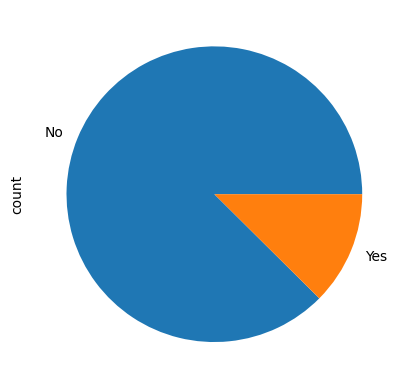

In [23]:
df['returned'].value_counts().plot.pie()

## Feature Engineering

In [24]:
df['access_date'] = pd.to_datetime(df['accessed_date'])
df = df.drop("accessed_date",axis=1)

## Predictive Model

In [25]:
df['returned'] = df['returned'].map({'Yes': 1, 'No': 0})
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age'])

In [26]:
# Encoding categorical variables
categorical_cols = ['gender', 'country', 'membership', 'language', 'pay_method', 'accessed_From', 'network_protocol']
df[categorical_cols] = df[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))

In [27]:
# Feature and target selection
features = ['duration_(secs)', 'bytes', 'age'] + categorical_cols
X = df[features]
y = df['returned']

In [28]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     21682
           1       0.14      0.00      0.00      3733

    accuracy                           0.85     25415
   macro avg       0.50      0.50      0.46     25415
weighted avg       0.75      0.85      0.79     25415

